# UnSupervised Learning R4 Project1 City Car Fuel Consumption

##### The data set was used in the 1983 American Statistical Association Exposition. The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 2 multi-valued discrete and 4 continuous variables. 

###### Attribute Information:

#Car Name – Name of the car

#Cyl – No of cylinders in the car – Multi-valued discrete

#Disp – Displacement – continuous

#Hp – Horsepower – continuous

#Wt – Weight – continuous

#Acc – Acceleration – continuous

#Yr – Model of the car – Multivalued discrete

#Mpg - Miles per gallon - continuous

In [186]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline


In [187]:
# Numerical libraries
import numpy as np   

from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

##### EDA & Pre-processing (Make sure to remove all non-numeric entries from numeric columns)

In [209]:
# reading the CSV file into pandas dataframe
cars_df = pd.read_csv("cars-dataset.csv") 

In [210]:
# Check top few records to get a feel of the data structure
cars_df.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [211]:
cars_df.describe().transpose()     # horsepower is missing

,count,mean,std,min,25%,50%,75%,max
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6


In [212]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [213]:
cars_df.shape

(398, 8)

In [214]:
if cars_df.isnull().values.any() == False:
    print("There are no nulls/NaN values in our data frame")

There are no nulls/NaN values in our data frame


##### removing all non-numeric entries from numeric columns

In [215]:
non_numeric_columns=cars_df.select_dtypes(include=["object"]).columns

In [216]:
for cols in non_numeric_columns:
    cars_df[cols].str.isnumeric().value_counts()
    print("Nos of non numeric values in column :",cols)
    print(cars_df[cols].loc[cars_df[cols].str.isnumeric() == False])

Nos of non numeric values in column : car name
0      chevrolet chevelle malibu
1              buick skylark 320
2             plymouth satellite
3                  amc rebel sst
4                    ford torino
                 ...            
393              ford mustang gl
394                    vw pickup
395                dodge rampage
396                  ford ranger
397                   chevy s-10
Name: car name, Length: 398, dtype: object
Nos of non numeric values in column : hp
32     ?
126    ?
330    ?
336    ?
354    ?
374    ?
Name: hp, dtype: object


###### Only HP is numeric column having non numeric values 

In [217]:
#Setting the missing value to mean of hp and convert the datatype to integer
hp = cars_df['hp'].loc[cars_df['hp'] != '?']
hpmean = hp.astype(str).astype(int).mean()
cars_df['hp'] = cars_df['hp'].replace('?',hpmean).astype(int)
cars_df['hp'].head()

0    130
1    165
2    150
3    150
4    140
Name: hp, dtype: int32

In [218]:
# Let us look at the target column which is 'Personal Loan' to understand how the data is distributed amongst the various values
PredictColumn="mpg"
cars_df.groupby(PredictColumn).count()

,car name,cyl,disp,hp,wt,acc,yr
mpg,,,,,,,
9.0,1,1,1,1,1,1,1
10.0,2,2,2,2,2,2,2
11.0,4,4,4,4,4,4,4
12.0,6,6,6,6,6,6,6
13.0,20,20,20,20,20,20,20
...,...,...,...,...,...,...,...
43.4,1,1,1,1,1,1,1
44.0,1,1,1,1,1,1,1
44.3,1,1,1,1,1,1,1


##  EDA - Univariant Analysis 

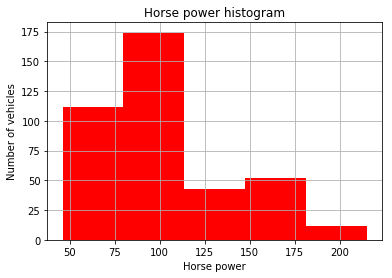

In [24]:
cars_df.hp[np.abs(cars_df.hp-cars_df.hp.mean())<=(3*cars_df.hp.std())].hist(bins=5,color='red');
plt.title("Horse power histogram")
plt.ylabel('Number of vehicles')
plt.xlabel('Horse power');

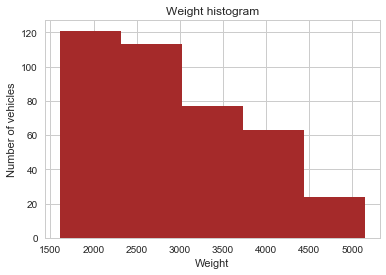

In [73]:
cars_df['wt'].hist(bins=5,color='brown');
plt.title("Weight histogram")
plt.ylabel('Number of vehicles')
plt.xlabel('Weight');

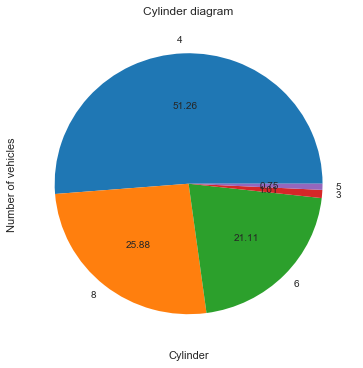

In [74]:
cars_df['cyl'].value_counts().plot.pie(figsize=(6, 6), autopct='%.2f')
plt.title("Cylinder diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Cylinder');

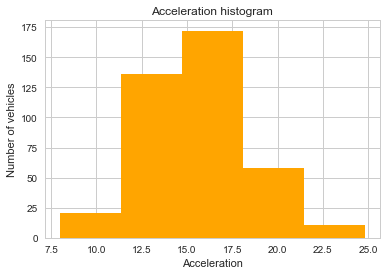

In [75]:
cars_df['acc'].hist(bins=5,color='orange');
plt.title("Acceleration histogram")
plt.ylabel('Number of vehicles')
plt.xlabel('Acceleration');

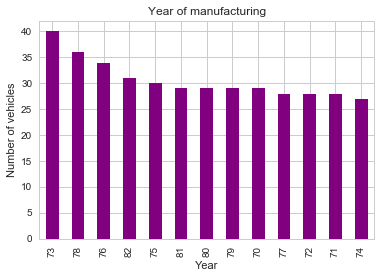

In [76]:
cars_df['yr'].value_counts().plot(kind='bar',color='purple')
plt.title("Year of manufacturing")
plt.ylabel('Number of vehicles')
plt.xlabel('Year');

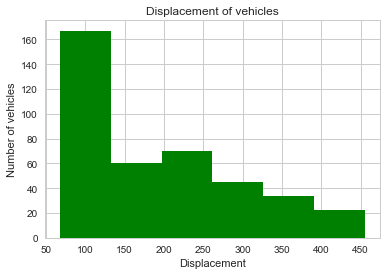

In [77]:
cars_df.disp.hist(bins=6,color='green');
plt.title("Displacement of vehicles")
plt.ylabel('Number of vehicles')
plt.xlabel('Displacement');

##  EDA - Bi-variant Analysis 

### Heatmap

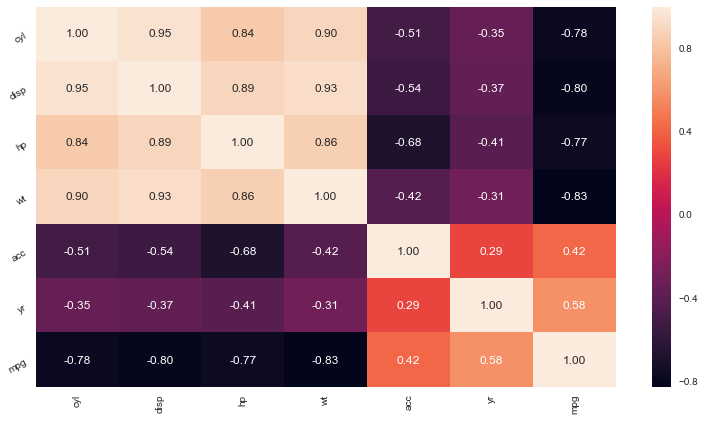

In [78]:
import seaborn as sns
corr = cars_df.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
a = sns.heatmap(corr, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

### Pair Plots

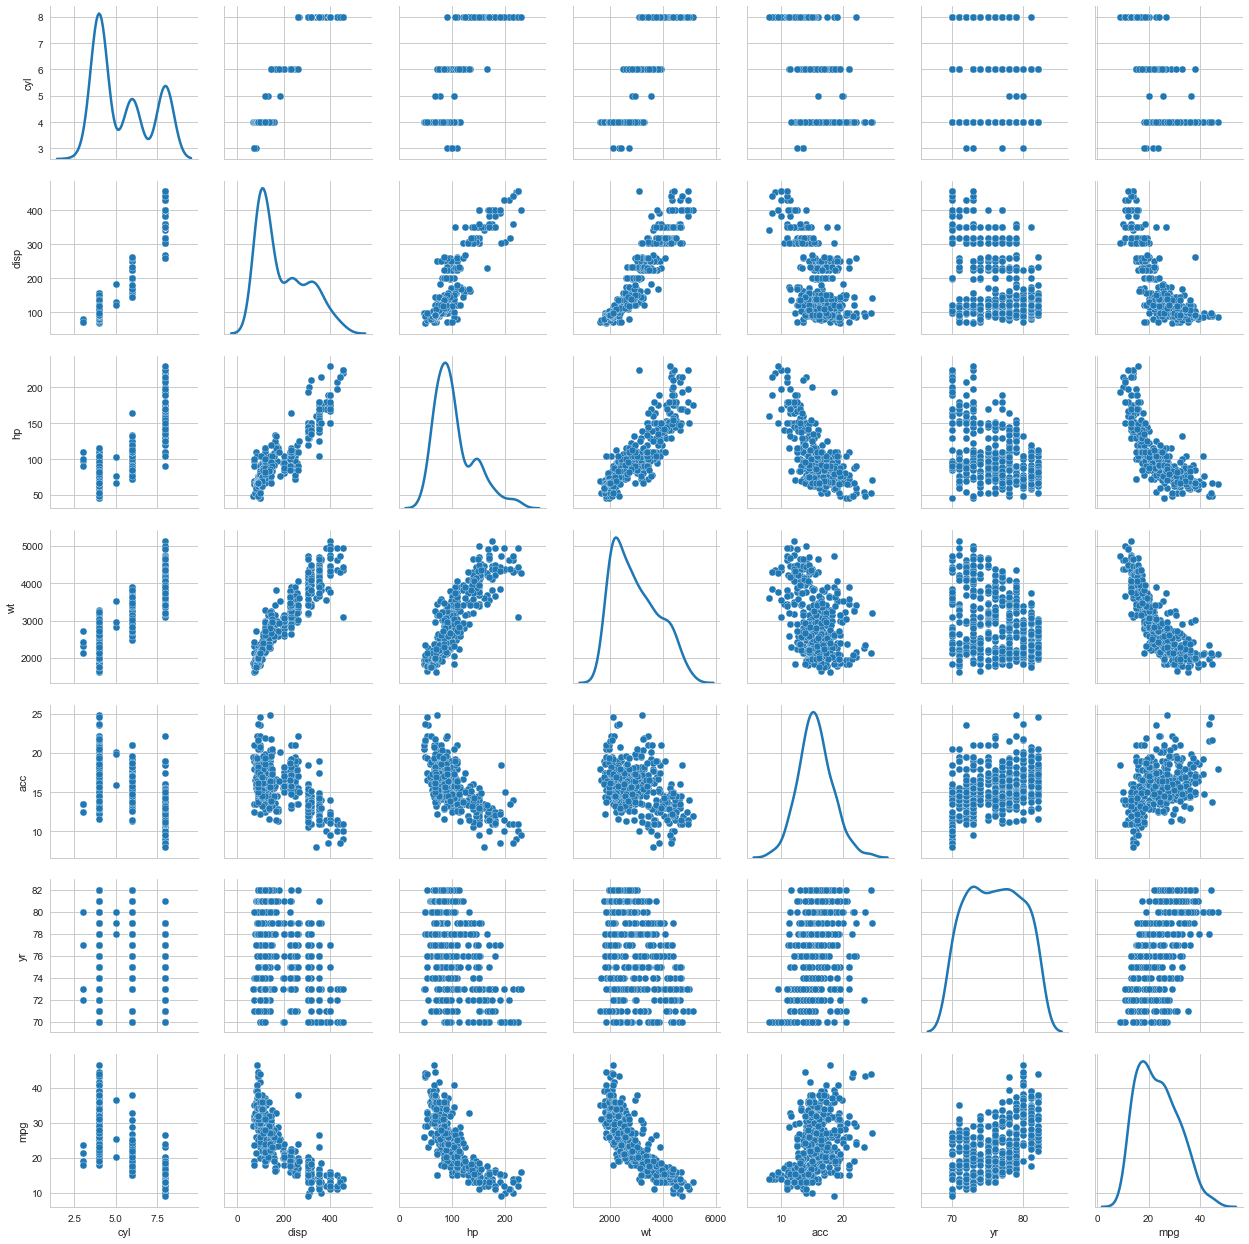

In [79]:

sns.pairplot(cars_df, diag_kind='kde')   # to plot density curve instead of histogram

## Inference: from the above gausian curves there seems to be 2-3 major clusters possible

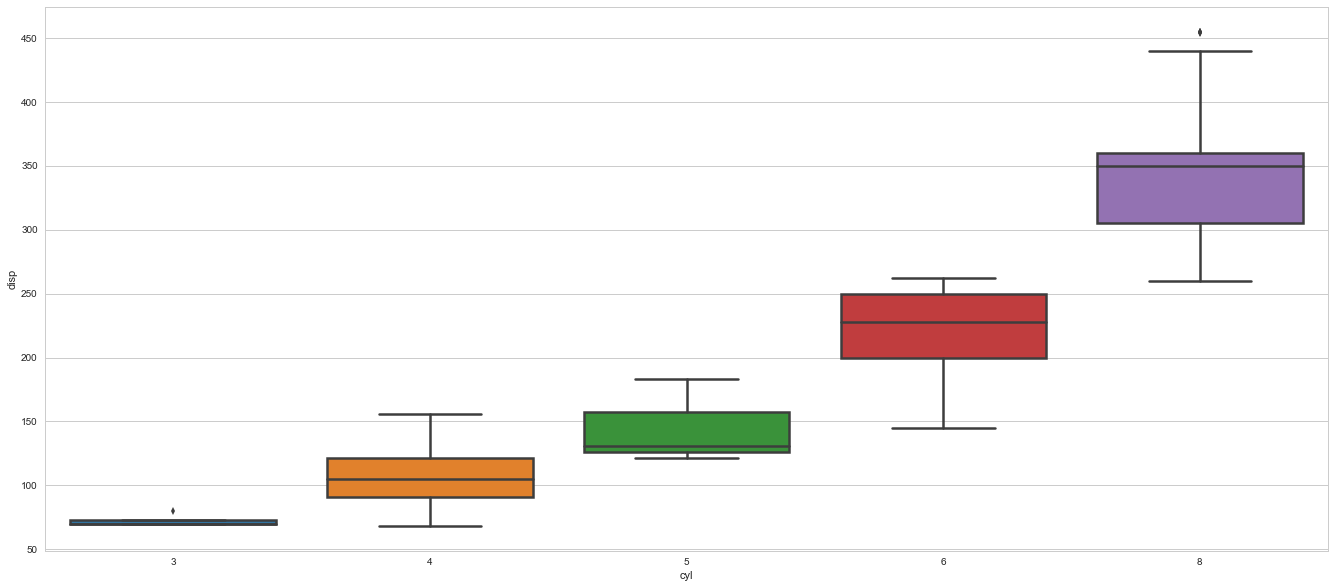

In [80]:
plt.rcParams['figure.figsize']=(23,10)
ax = sns.boxplot(x="cyl", y="disp", data=cars_df)

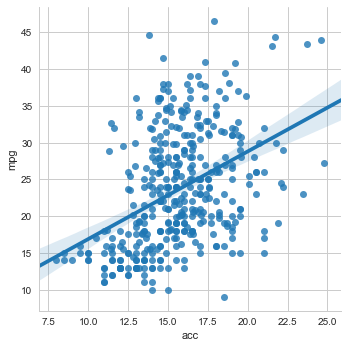

In [81]:
g = sns.lmplot('acc',"mpg", cars_df);

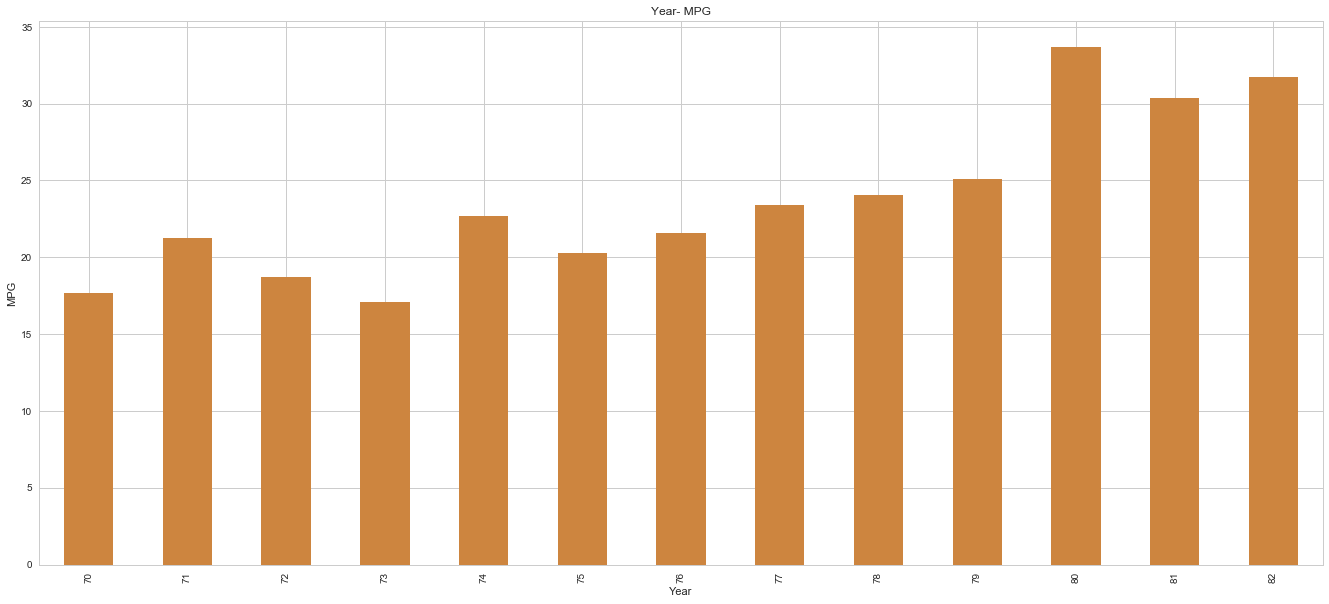

In [82]:
cars_df.groupby('yr')['mpg'].mean().plot(kind='bar', color = 'peru');
plt.title("Year- MPG")
plt.ylabel('MPG')
plt.xlabel('Year');

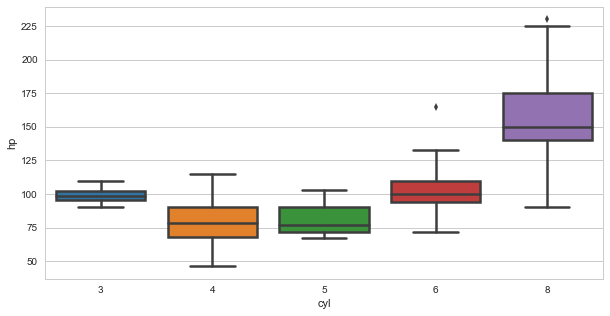

In [83]:
plt.rcParams['figure.figsize']=(10,5)
ax = sns.boxplot(x="cyl", y="hp", data=cars_df)

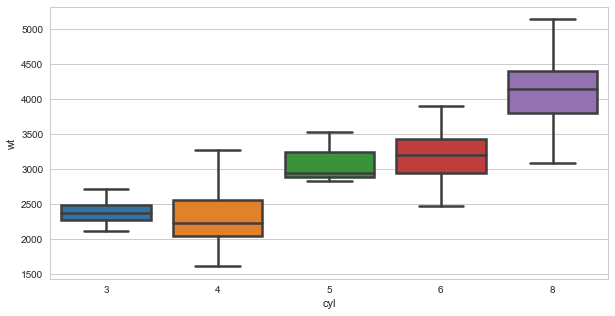

In [84]:
plt.rcParams['figure.figsize']=(10,5)
ax = sns.boxplot(x="cyl", y="wt", data=cars_df)

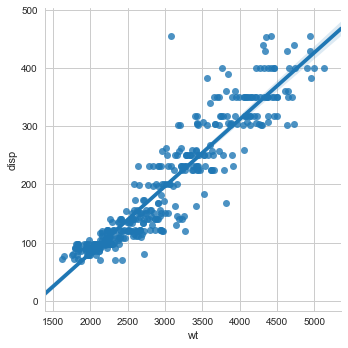

In [85]:
g = sns.lmplot('wt',"disp", cars_df);

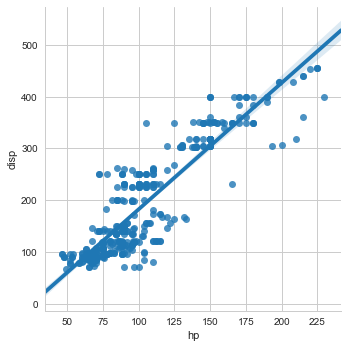

In [86]:
g = sns.lmplot('hp',"disp", cars_df);

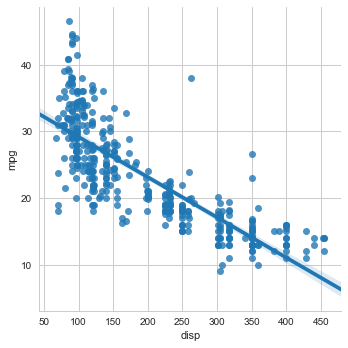

In [87]:
g = sns.lmplot('disp',"mpg", cars_df);

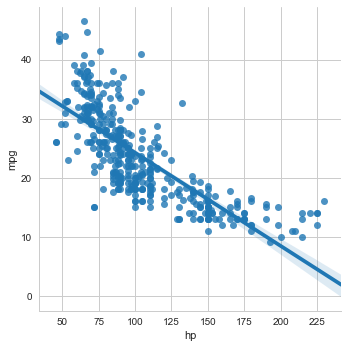

In [88]:
g = sns.lmplot('hp',"mpg", cars_df);

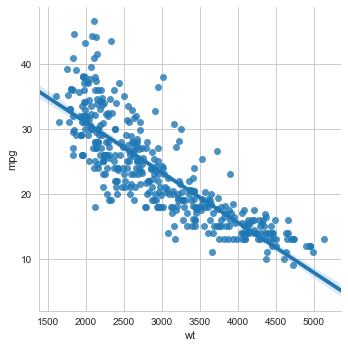

In [89]:
g = sns.lmplot('wt',"mpg", cars_df);

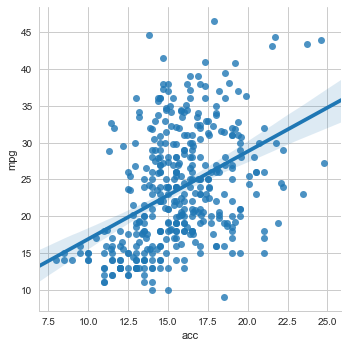

In [90]:
g = sns.lmplot('acc',"mpg", cars_df);

# Inferences:
#Mpg column is having good corelation on cyl,disp,wt
#cyl ,disp and wt and hp are having negative corelation

In [219]:
non_numeric_columns=cars_df.select_dtypes(include=["object"]).columns

In [220]:
from sklearn import preprocessing
for c in non_numeric_columns:
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(cars_df[c].values))
        cars_df[c] = lbl.transform(list(cars_df[c].values))

In [221]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null int64
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null int32
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int32(1), int64(4)
memory usage: 23.4 KB


In [222]:
from scipy.stats import zscore

cars_df_z = cars_df.apply(zscore)

# KMeans Clustering

In [223]:
cluster_range = range( 2, 12)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, init='k-means++')
    clusters.fit(cars_df_z)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,2,1664.988666
1,3,1304.759035
2,4,1093.542954
3,5,993.326163
4,6,919.432886
5,7,846.873745
6,8,783.062515
7,9,739.984021
8,10,699.304269
9,11,657.446964


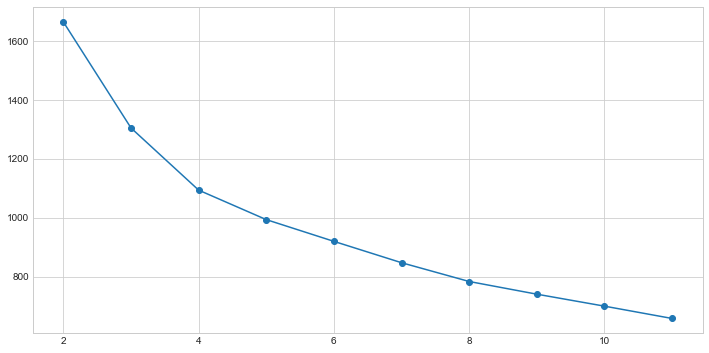

In [224]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [225]:
# The elbow plot confirms our visual analysis that there are likely 3 or 4 good clusters
# Let us start with 3 clusters

In [226]:
cluster = KMeans( n_clusters = 4, init='k-means++')
cluster.fit(cars_df_z)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

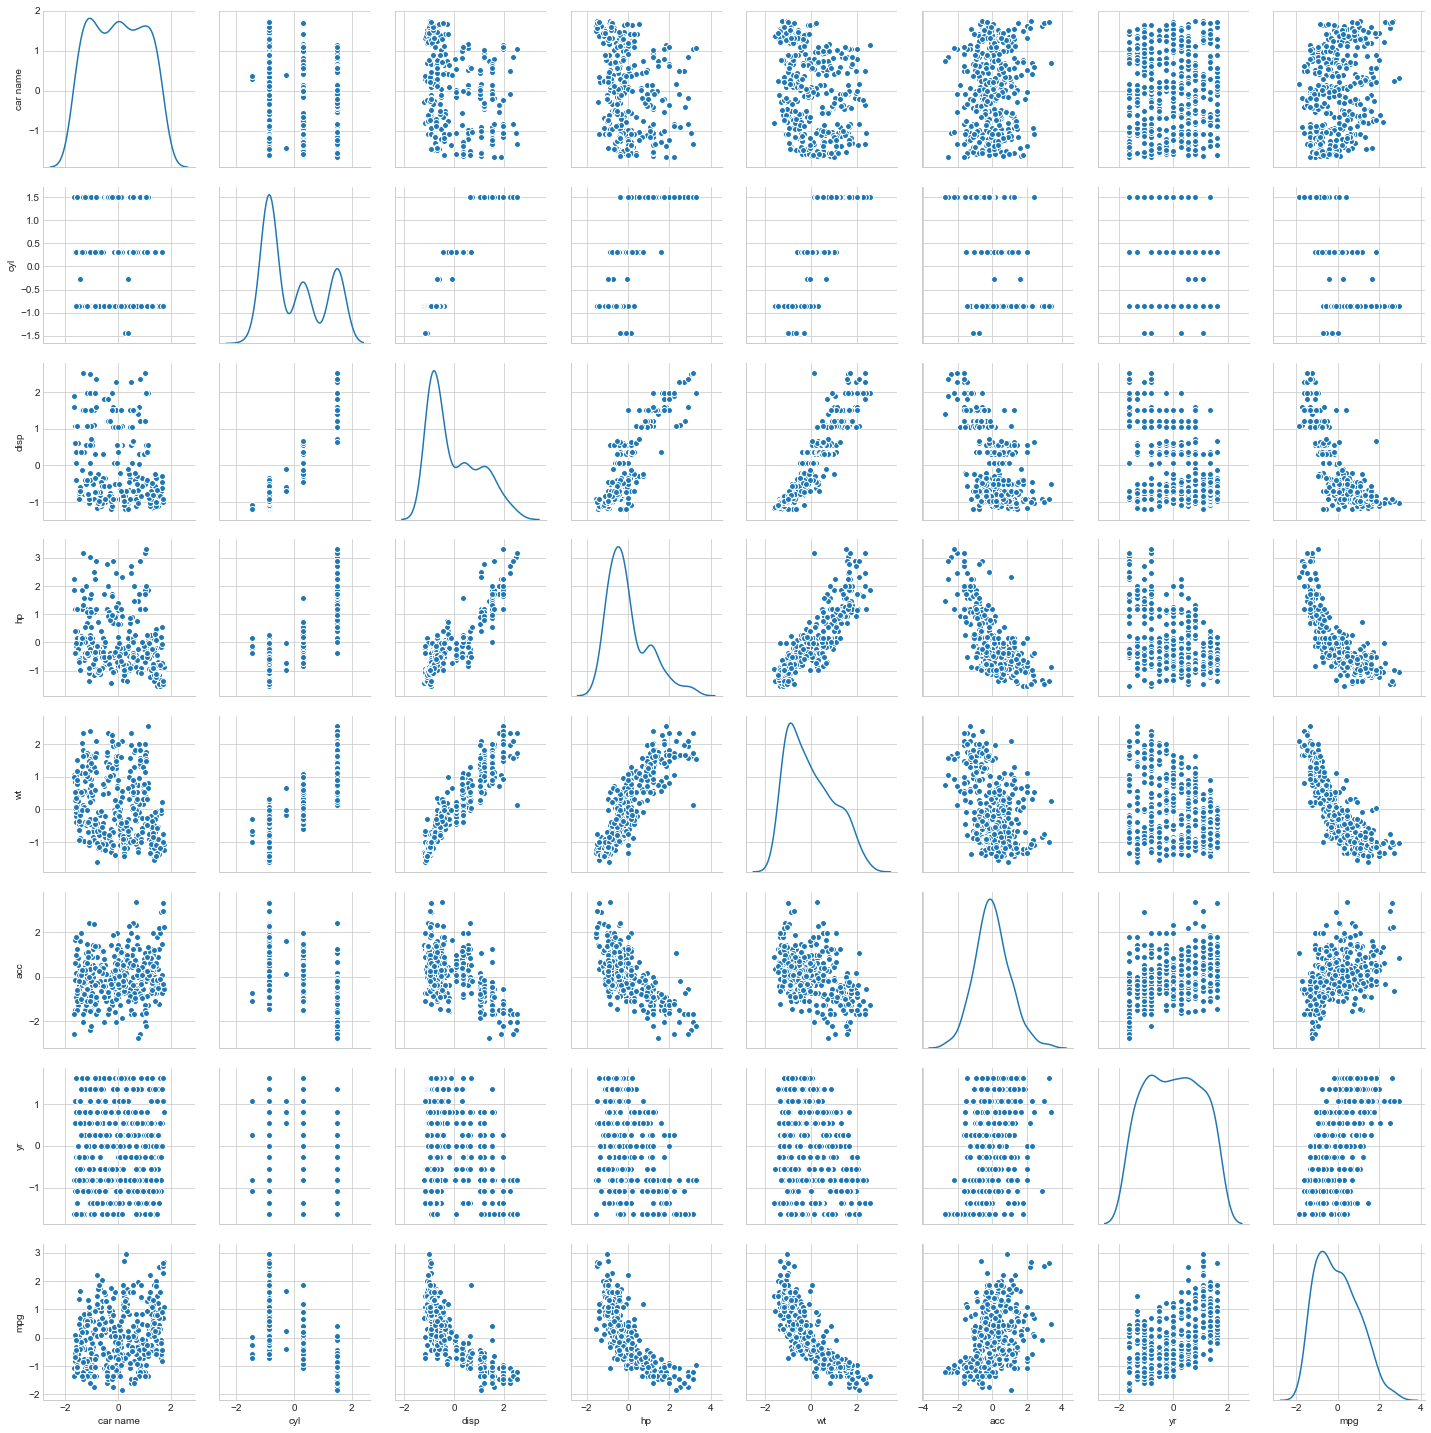

In [227]:
sns.pairplot(cars_df_z, diag_kind='kde')   

In [229]:
centroids = cluster.cluster_centers_
centroids

array([[ 0.21215647, -0.82450284, -0.78942423, -0.75501283, -0.7828093 ,
         0.39036529,  1.10481008,  1.19111585],
       [ 0.4762086 , -0.80538161, -0.77898942, -0.53307119, -0.73644325,
         0.27726168, -0.65104117,  0.19299901],
       [-0.48333301,  0.38707332,  0.3064296 , -0.03921289,  0.35389573,
         0.33631692,  0.10985173, -0.4818969 ],
       [-0.31977049,  1.49819126,  1.50392292,  1.5184657 ,  1.40409797,
        -1.0861486 , -0.68832385, -1.16379715]])

In [230]:
centroid_df = pd.DataFrame(centroids, columns = list(cars_df_z) )
centroid_df

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,0.212156,-0.824503,-0.789424,-0.755013,-0.782809,0.390365,1.104810,1.191116
1,0.476209,-0.805382,-0.778989,-0.533071,-0.736443,0.277262,-0.651041,0.192999
2,-0.483333,0.387073,0.306430,-0.039213,0.353896,0.336317,0.109852,-0.481897
3,-0.319770,1.498191,1.503923,1.518466,1.404098,-1.086149,-0.688324,-1.163797


In [231]:
prediction=cluster.predict(cars_df_z)
cars_df_z["GROUP"] = prediction     # Creating a new column "GROUP" which will hold the cluster id of each record

# Instead of interpreting the numerical values of the centroids, let us do a visual analysis by converting the 
# centroids and the data in the cluster into box plots.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F7A1593A90>,
      dtype=object)

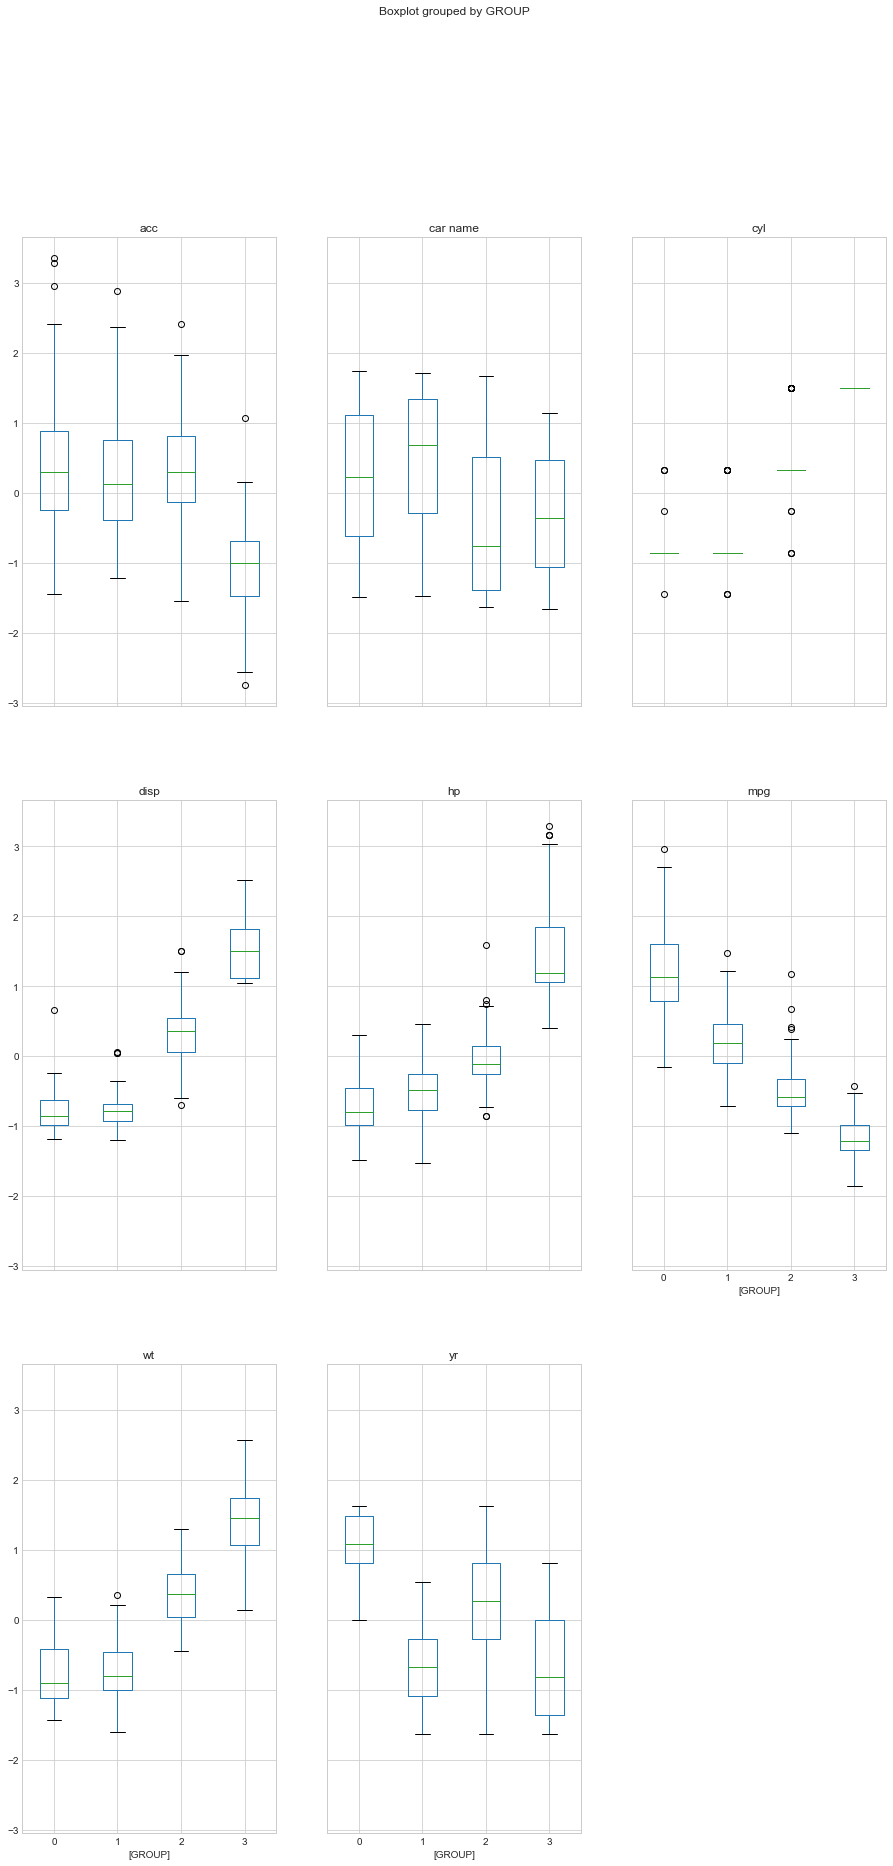

In [232]:
import matplotlib.pylab as plt

cars_df_z.boxplot(by = 'GROUP',  layout=(4,3), figsize=(15, 40))



In [233]:
# There are outliers on each dimension


### Note: When we remove outliers and replace with median or mean, the distribution shape changes, the standard deviation becomes tighter creating new outliers. The new outliers would be much closer to the centre than original outliers so we accept them without modifying them


In [236]:
# Addressing outliers at group level

data = cars_df_z
       
def replace(group):
    median, std = group.median(), group.std()  #Get the median and the standard deviation of every group 
    outliers = (group - median).abs() > 2*std # Subtract median from every member of each group. Take absolute values > 2std
    group[outliers] = group.median()       
    return group

data_corrected = (data.groupby('GROUP').transform(replace)) 
concat_data = data_corrected.join(pd.DataFrame(cars_df_z['GROUP']))

C:\Users\Radhika\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [237]:
cars_df_z.groupby("GROUP").count()

,car name,cyl,disp,hp,wt,acc,yr,mpg
GROUP,,,,,,,,
0,111,111,111,111,111,111,111,111
1,104,104,104,104,104,104,104,104
2,89,89,89,89,89,89,89,89
3,94,94,94,94,94,94,94,94


#### Use linear regression model on different clusters separately and print the coefficients of the models individually (10 points)

In [238]:
from sklearn import linear_model,metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score

In [239]:
rmse=[]
coeff=[]
accuracies = {}
score=[]
y_pred=[]
cm_lr=[]
y_testa=[]
for x in cars_df_z["GROUP"].unique():
    df=cars_df_z.loc[cars_df_z["GROUP"]==x].copy()
    X = df.copy()
    y = df["mpg"]
    X.drop("mpg",axis=1,inplace=True)
    X.drop("GROUP",axis=1,inplace=True)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,random_state=5)
    # create linear regression object
    reg = linear_model.LinearRegression()
    # train the model using the training sets 
    reg.fit(X_train, y_train)
    ypredict=reg.predict(X_test)
    rmse.append(np.sqrt(metrics.mean_squared_error(y_test,ypredict)))
    coeff.append(reg.coef_)
    acc_score=reg.score(X_test, y_test)*100
    score.append(acc_score)
    accuracies[str(x)]=acc_score
    ypred=reg.predict(X_test)
    y_pred.append(ypred)
    y_testa.append(y_test)


In [240]:
for x in cars_df_z["GROUP"].unique():
    print('Details of results in cluster :%1.3f'%(x))
    print('Rmse error in the first test is :%1.3f'%(rmse[x]))
    # regression coefficients
    print('Coefficients: \n', coeff[x]) 
    # variance score: 1 means perfect prediction 
    print('Variance score: {}'.format(score[x])) 
    print('')

Details of results in cluster :3.000
Rmse error in the first test is :0.537
Coefficients: 
 [ 0.09979017  0.35019136  0.45243476 -0.00967128 -1.23205116  0.19890238
  0.39449666]
Variance score: 34.85458056350168

Details of results in cluster :1.000
Rmse error in the first test is :0.323
Coefficients: 
 [-0.03768283  0.17397192 -0.43852048 -0.2097651  -0.55601606 -0.06227076
  0.1392097 ]
Variance score: 54.465289137768615

Details of results in cluster :2.000
Rmse error in the first test is :0.329
Coefficients: 
 [ 0.04347352  0.09687539  0.28187024  0.0289679  -0.7421741  -0.04119188
  0.30630676]
Variance score: 4.2312517986903835

Details of results in cluster :0.000
Rmse error in the first test is :0.163
Coefficients: 
 [-0.03244195 -0.02325681 -0.04707878 -0.15580358 -0.08916529 -0.20639353
  0.17910385]
Variance score: 39.25902761372708



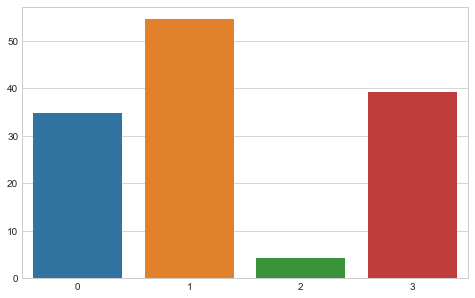

In [241]:
sns.set_style('whitegrid')
plt.figure(figsize = (8,5))
plt.yticks(np.arange(0,100,10))
sns.barplot(x = list(accuracies.keys()), y = list(accuracies.values()))

# Kmeans clustering post dropping insignificant variables car name 

In [206]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null int64
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null int32
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int32(1), int64(4)
memory usage: 23.4 KB


In [207]:
cars_df.drop("car name",axis=1,inplace=True)
cars_df.drop("acc",axis=1,inplace=True)

In [242]:
cars_df_z = cars_df.apply(zscore)
cars_df_z.drop("car name",axis=1,inplace=True)
cars_df_z.drop("acc",axis=1,inplace=True)

In [243]:
cluster_range = range( 2, 6)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans( num_clusters, n_init = 5)
    clusters.fit(cars_df_z)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,2,985.883728
1,3,688.544146
2,4,485.091876
3,5,418.084534


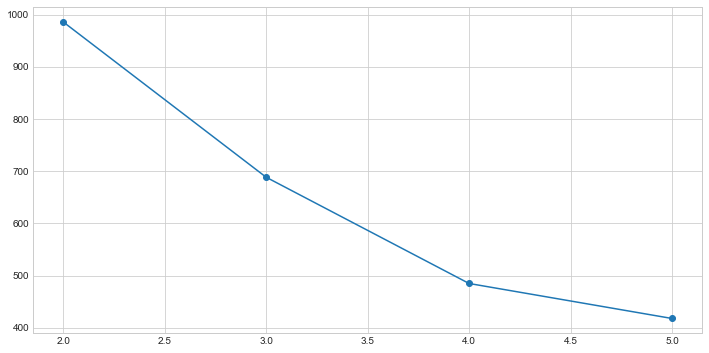

In [244]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [245]:
cluster = KMeans( n_clusters = 4, random_state = 2354 )
cluster.fit(cars_df_z)
prediction=cluster.predict(cars_df_z)
cars_df_z["GROUP"] = prediction     # Creating a new column "GROUP" which will hold the cluster id of each record

In [246]:
rmse=[]
coeff=[]
accuracies = {}
score=[]
y_pred=[]
cm_lr=[]
y_testa=[]
for x in cars_df_z["GROUP"].unique():
    df=cars_df_z.loc[cars_df_z["GROUP"]==x].copy()
    X = df.copy()
    y = df["mpg"]
    X.drop("mpg",axis=1,inplace=True)
    X.drop("GROUP",axis=1,inplace=True)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,random_state=5)
    # create linear regression object
    reg = linear_model.LinearRegression()
    # train the model using the training sets 
    reg.fit(X_train, y_train)
    ypredict=reg.predict(X_test)
    rmse.append(np.sqrt(metrics.mean_squared_error(y_test,ypredict)))
    coeff.append(reg.coef_)
    acc_score=reg.score(X_test, y_test)*100
    score.append(acc_score)
    accuracies["Cluster "+str(x)]=acc_score
    ypred=reg.predict(X_test)
    y_pred.append(ypred)
    y_testa.append(y_test)

In [247]:
for x in cars_df_z["GROUP"].unique():
    print('Details of results in cluster :%1.3f'%(x))
    print('Rmse error in the first test is :%1.3f'%(rmse[x]))
    # regression coefficients
    print('Coefficients: \n', coeff[x]) 
    # variance score: 1 means perfect prediction 
    print('Variance score: {}'.format(score[x])) 
    print('')

Details of results in cluster :3.000
Rmse error in the first test is :0.474
Coefficients: 
 [ 1.1012547  -0.41253662 -0.41374288 -0.73788504  0.26899221]
Variance score: 49.93484907618725

Details of results in cluster :0.000
Rmse error in the first test is :0.155
Coefficients: 
 [-0.08871203  0.20856191 -0.12364231 -0.30479172  0.10526869]
Variance score: 56.78540273895105

Details of results in cluster :1.000
Rmse error in the first test is :0.356
Coefficients: 
 [ 0.05527047 -0.28729047 -0.00218196 -0.71676255  0.14834667]
Variance score: 40.51324405580502

Details of results in cluster :2.000
Rmse error in the first test is :0.321
Coefficients: 
 [ 0.05716135  0.02681947 -0.10774681 -0.33128181  0.21335603]
Variance score: 43.2151936628233



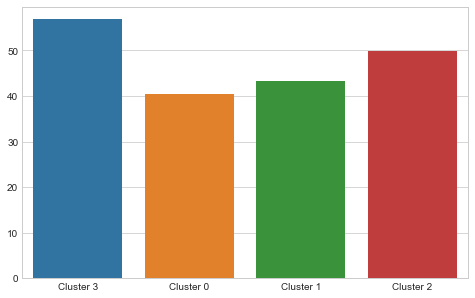

In [248]:
sns.set_style('whitegrid')
plt.figure(figsize = (8,5))
plt.yticks(np.arange(0,100,10))
sns.barplot(x = list(accuracies.keys()), y = list(accuracies.values()))

## Inference: Max accuracy reached is approx 56%, dropping name is not giving too much of difference in accuracy

# Using Heirarchical clustering

In [ ]:
#cars_df.drop("car name",axis=1,inplace=True)

In [249]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

In [250]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(cars_df, 'average')
c, coph_dists = cophenet(Z , pdist(cars_df))

c

0.7599142617367264

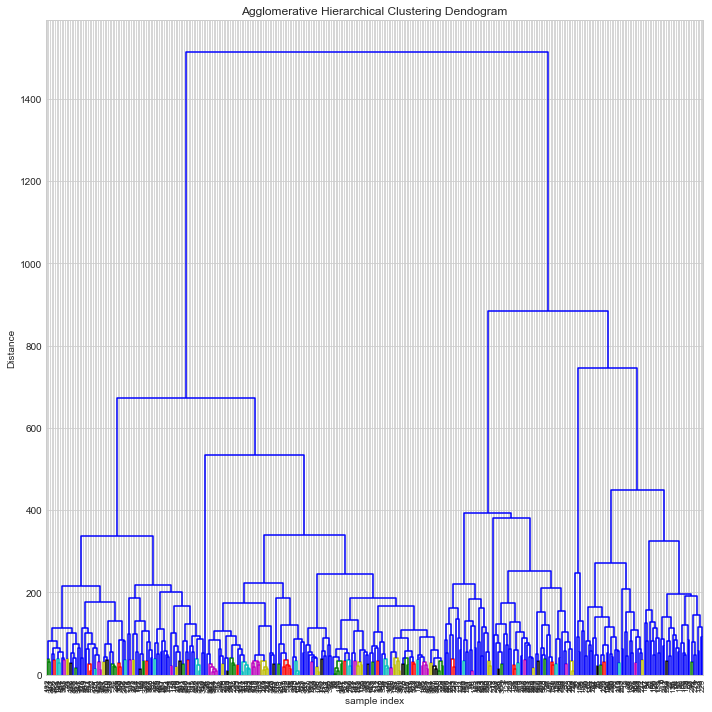

In [251]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [252]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(cars_df, 'complete')
c, coph_dists = cophenet(Z , pdist(cars_df))

c

0.7725653287977468

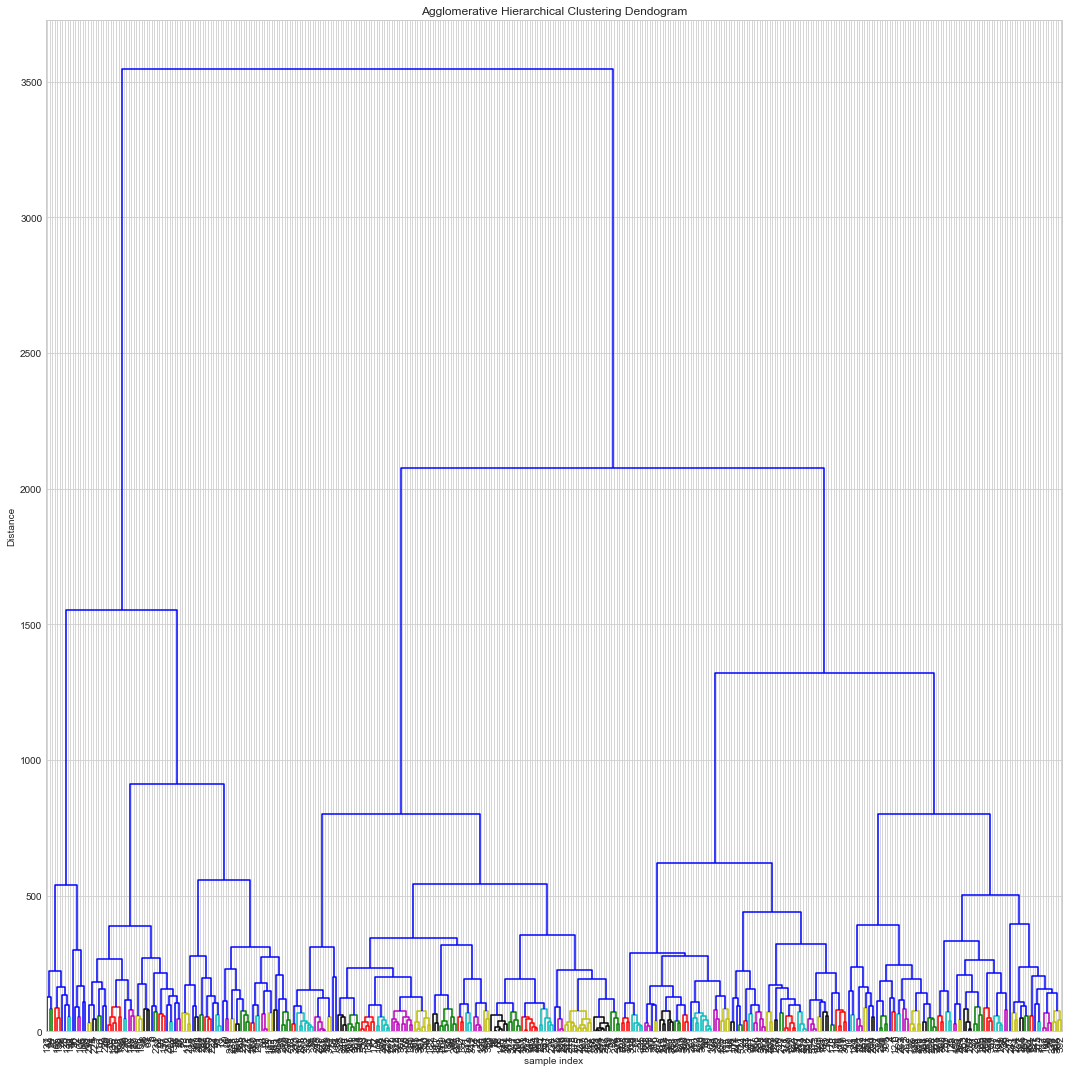

In [253]:
plt.figure(figsize=(15, 15))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=90,  leaf_font_size=10. )
plt.tight_layout()

In [254]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(cars_df, 'ward')
c, coph_dists = cophenet(Z , pdist(cars_df))

c

0.7065562408971137

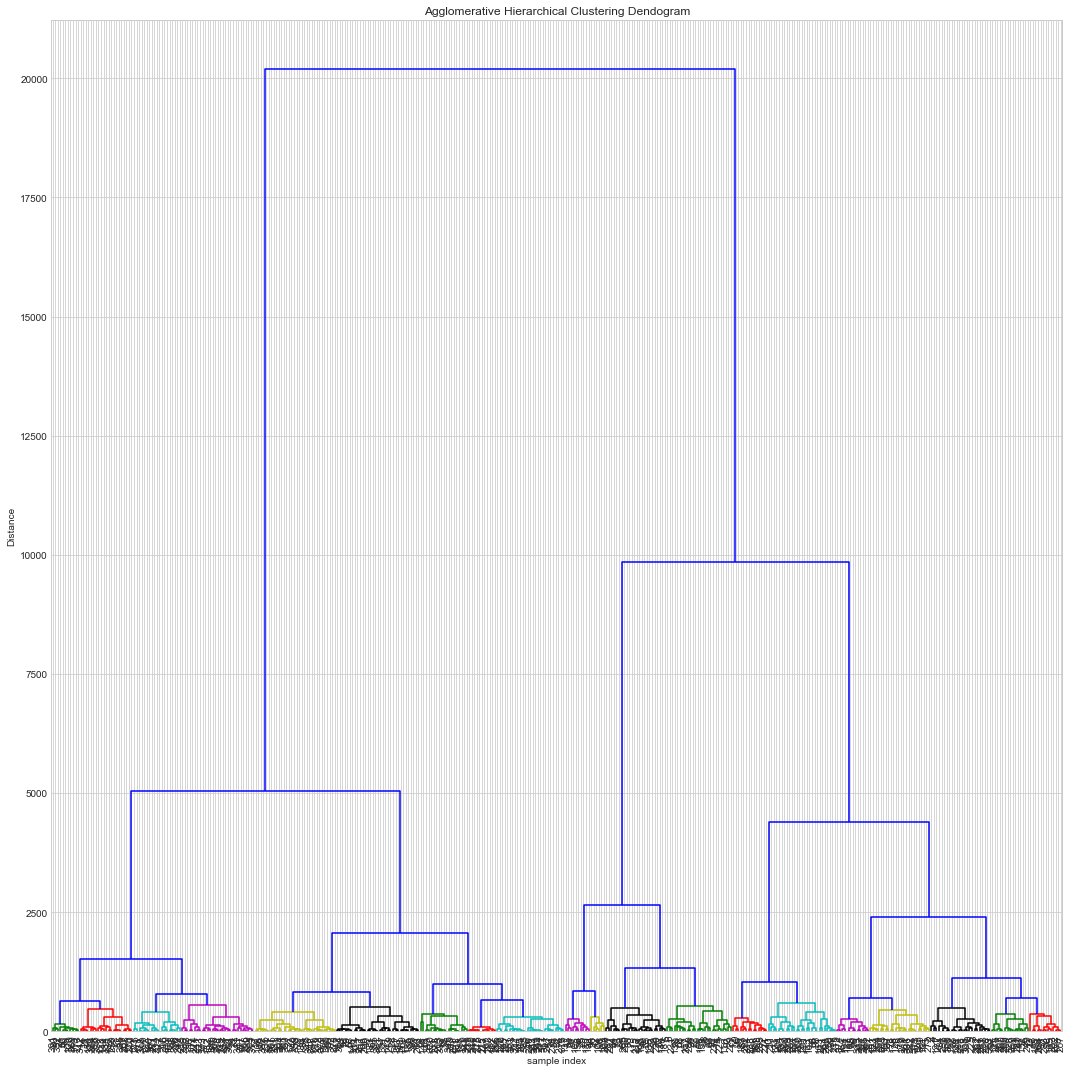

In [255]:
plt.figure(figsize=(15, 15))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=600,  leaf_font_size=10. )
plt.tight_layout()

## Inference: All methods are giving similar result but given 'Complete' is 0.78 closer to 1, so using the same

In [256]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=3, affinity='manhattan',  linkage='complete')
model.fit(cars_df)
cars_df['labels'] = model.labels_
cars_df.groupby(["labels"]).count()
cars_clusters = cars_df.groupby(['labels'])

### Inference: Euclidean and l2 was giving similar result , but max accuracy is when I used L1 or manhattan method

In [257]:
cars_df.groupby(["labels"]).count()

,car name,cyl,disp,hp,wt,acc,yr,mpg
labels,,,,,,,,
0,172,172,172,172,172,172,172,172
1,66,66,66,66,66,66,66,66
2,160,160,160,160,160,160,160,160


In [258]:
rmse=[]
coeff=[]
accuracies = {}
score=[]
y_pred=[]
cm_lr=[]
y_testa=[]
for x in cars_df["labels"].unique():
    df=cars_df.loc[cars_df["labels"]==x].copy()
    X = df.copy()
    y = df["mpg"]
    X.drop("mpg",axis=1,inplace=True)
    X.drop("labels",axis=1,inplace=True)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,random_state=5)
    # create linear regression object
    reg = linear_model.LinearRegression()
    # train the model using the training sets 
    reg.fit(X_train, y_train)
    ypredict=reg.predict(X_test)
    rmse.append(np.sqrt(metrics.mean_squared_error(y_test,ypredict)))
    coeff.append(reg.coef_)
    acc_score=reg.score(X_test, y_test)*100
    score.append(acc_score)
    accuracies["Cluster "+str(x)]=acc_score
    ypred=reg.predict(X_test)
    y_pred.append(ypred)
    y_testa.append(y_test)

In [259]:
for x in cars_df["labels"].unique():
    print('Details of results in cluster :%1.3f'%(x))
    print('Rmse error in the first test is :%1.3f'%(rmse[x]))
    # regression coefficients
    print('Coefficients: \n', coeff[x]) 
    # variance score: 1 means perfect prediction 
    print('Variance score: {}'.format(score[x])) 
    print('')

Details of results in cluster :0.000
Rmse error in the first test is :2.398
Coefficients: 
 [ 0.00245234 -0.02482243  0.00150887 -0.04309662 -0.00458694 -0.11174904
  0.70715671]
Variance score: 70.93275288632925

Details of results in cluster :1.000
Rmse error in the first test is :1.443
Coefficients: 
 [-1.42194713e-03  2.45279057e-15  2.78219253e-03 -2.65554543e-02
 -1.22749571e-03 -5.36725501e-01  3.82611854e-01]
Variance score: 27.501092769795875

Details of results in cluster :2.000
Rmse error in the first test is :4.154
Coefficients: 
 [ 4.63519743e-03  1.07878425e+01 -6.19016606e-02 -2.19786713e-02
 -5.31453236e-03 -6.51388370e-02  1.01246773e+00]
Variance score: 46.51927324416671



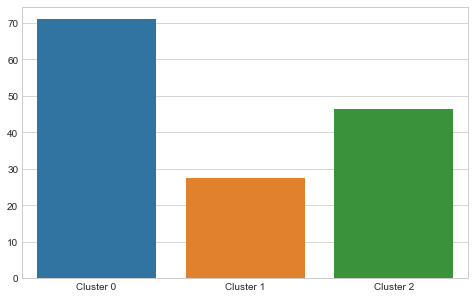

In [260]:
sns.set_style('whitegrid')
plt.figure(figsize = (8,5))
plt.yticks(np.arange(0,100,10))
sns.barplot(x = list(accuracies.keys()), y = list(accuracies.values()))

#### Inference: cluster 3 is giving a better accuracy of 54% using Euclidean, l2 and 70% in cluster 2 for manhattan, l1 using aglomerative clustering than the previous Kmeans. Also when i dropped the car name it gave only 68% but when i included the car name it gave 70%